In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("train.txt", sep=";")

In [3]:
df

,text,emoji
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
15995,i just had a very brief time in the beanbag an...,sadness
15996,i am now turning and i feel pathetic that i am...,sadness
15997,i feel strong and good overall,joy
15998,i feel like this was such a rude comment and i...,anger


<AxesSubplot:xlabel='emoji', ylabel='count'>

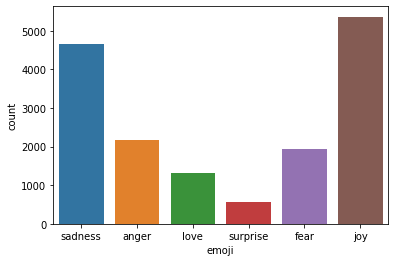

In [4]:
sns.countplot(data=df, x="emoji")

In [5]:
import re
import string
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras.preprocessing.text import Tokenizer

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
encoder = LabelEncoder()
df["emoji"] = encoder.fit_transform(df["emoji"])

In [8]:
df

,text,emoji
0,i didnt feel humiliated,4
1,i can go from feeling so hopeless to so damned...,4
2,im grabbing a minute to post i feel greedy wrong,0
3,i am ever feeling nostalgic about the fireplac...,3
4,i am feeling grouchy,0
...,...,...
15995,i just had a very brief time in the beanbag an...,4
15996,i am now turning and i feel pathetic that i am...,4
15997,i feel strong and good overall,2
15998,i feel like this was such a rude comment and i...,0


In [10]:
max_features = 1000
vectorize_layer = layers.TextVectorization(max_tokens=max_features)

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x, y = df["text"], df["emoji"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [13]:
vectorize_layer.adapt(x_train)

In [14]:
model = tf.keras.Sequential([
    layers.Embedding(max_features + 1, 16),
    layers.Dropout(0.2),
    layers.GlobalAveragePooling1D(),
    layers.Dropout(0.2),
    layers.Dense(1)
])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 16)          16016     
                                                                 
 dropout (Dropout)           (None, None, 16)          0         
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
Total params: 16,033
Trainable params: 16,033
Non-trainable params: 0
____________________________________________________

In [17]:
model.compile(loss=losses.BinaryCrossentropy(from_logits=True),
             optimizer="adam",
             metrics=tf.metrics.BinaryAccuracy(threshold=0.0))

In [18]:
epochs = 10
history = model.fit(x_train, epochs=epochs)

Epoch 1/10


ValueError: in user code:

    File "c:\users\artem\appdata\local\programs\python\python39\lib\site-packages\keras\engine\training.py", line 1021, in train_function  *
        return step_function(self, iterator)
    File "c:\users\artem\appdata\local\programs\python\python39\lib\site-packages\keras\engine\training.py", line 1010, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\users\artem\appdata\local\programs\python\python39\lib\site-packages\keras\engine\training.py", line 1000, in run_step  **
        outputs = model.train_step(data)
    File "c:\users\artem\appdata\local\programs\python\python39\lib\site-packages\keras\engine\training.py", line 861, in train_step
        self._validate_target_and_loss(y, loss)
    File "c:\users\artem\appdata\local\programs\python\python39\lib\site-packages\keras\engine\training.py", line 818, in _validate_target_and_loss
        raise ValueError(

    ValueError: Target data is missing. Your model was compiled with loss=<keras.losses.BinaryCrossentropy object at 0x00000182BCCFEC70>, and therefore expects target data to be provided in `fit()`.
